In [1]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import copy
import os
import sys

# only needed for tutorial, monkey patches visualization
sys.path.append('..')
import open3d_tutorial as o3dtut
# change to True if you want to interact with the visualization windows
o3dtut.interactive = not "CI" in os.environ

# Transformation
The geometry types of Open3D have a number of transformation methods. In this tutorial we show how to use `translate`, `rotate`, `scale`, and `transform`.

## Translate
The first transformation method we want to look at is `translate`. The translate method takes a single 3D vector $t$ as input and translates all points/vertices of the geometry by this vector, $v_t = v + t$. The code below shows how the mesh is translated once in the x-directon and once in the y-direction.

Center of mesh: [0.05167549 0.05167549 0.05167549]
Center of mesh tx: [1.35167549 0.05167549 0.05167549]
Center of mesh ty: [0.05167549 1.35167549 0.05167549]


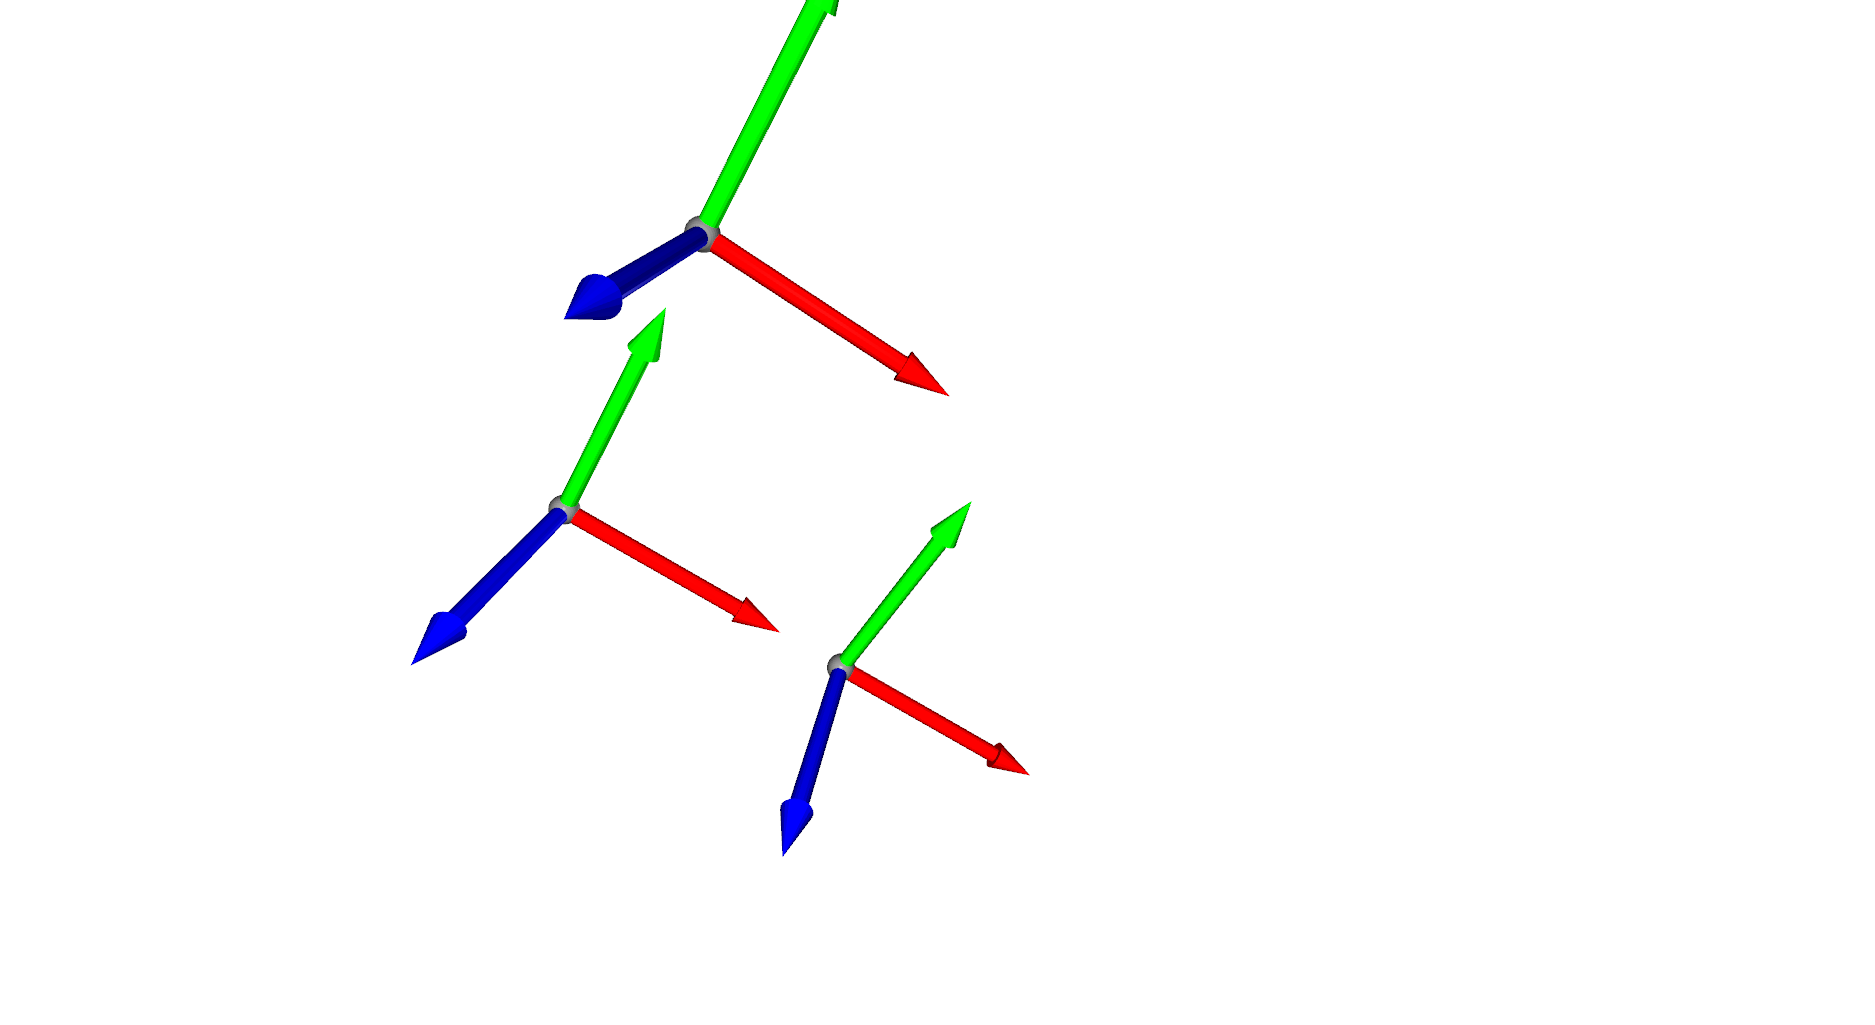

In [2]:
mesh = o3d.geometry.TriangleMesh.create_coordinate_frame()
mesh_tx = copy.deepcopy(mesh).translate((1.3, 0, 0))
mesh_ty = copy.deepcopy(mesh).translate((0, 1.3, 0))
print(f'Center of mesh: {mesh.get_center()}')
print(f'Center of mesh tx: {mesh_tx.get_center()}')
print(f'Center of mesh ty: {mesh_ty.get_center()}')
o3d.visualization.draw_geometries([mesh, mesh_tx, mesh_ty])

<div class="alert alert-info">
    
**Note:** 

The method `get_center` returns the mean of the `TriangleMesh` vertices. That means that for a coordinate frame created at the origin `[0,0,0]`, `get_center` will return `[0.05167549 0.05167549 0.05167549]`.

</div>

The method takes a second argument `relative` that is by default set to `True`. If set to `False`, the center of the geometry is translated directly to the position specified in the first argument.

In [ ]:
mesh = o3d.geometry.TriangleMesh.create_coordinate_frame()
mesh_mv = copy.deepcopy(mesh).translate((2, 2, 2), relative=False)
print(f'Center of mesh: {mesh.get_center()}')
print(f'Center of translated mesh: {mesh_mv.get_center()}')
o3d.visualization.draw_geometries([mesh, mesh_mv])

## Rotation
The geometry types of Open3D can also be rotated with the method `rotate`. It takes as first argument a rotation matrix `R`. As rotations in 3D can be parametrized in a number of ways, Open3D provides convenience functions to convert from different parametrizations to rotation matrices:

- Convert from [Euler angles](https://en.wikipedia.org/wiki/Euler_angles) with `get_rotation_matrix_from_xyz` (where `xyz` can also be of the form `yzx`, `zxy`, `xzy`, `zyx`, and `yxz`)
- Convert from [Axis-angle representation](https://en.wikipedia.org/wiki/Axis%E2%80%93angle_representation) with `get_rotation_matrix_from_axis_angle`
- Convert from [Quaternions](https://en.wikipedia.org/wiki/Quaternion) with `get_rotation_matrix_from_quaternion`

In the code below we rotate the mesh using Euler angles.

In [ ]:
mesh = o3d.geometry.TriangleMesh.create_coordinate_frame()
mesh_r = copy.deepcopy(mesh)
R = mesh.get_rotation_matrix_from_xyz((np.pi / 2, 0, np.pi / 4))
mesh_r.rotate(R, center=(0, 0, 0))
o3d.visualization.draw_geometries([mesh, mesh_r])

The function `rotate` has a second argument `center` that is by default set to `True`. This indicates that the object is first centered prior to applying the rotation and then moved back to its previous center. If this argument is set to `False`, then the rotation will be applied directly, such that the whole geometry is rotated around the coordinate center. This implies that the mesh center can be changed after the rotation.

In [ ]:
mesh = o3d.geometry.TriangleMesh.create_coordinate_frame()
mesh_r = copy.deepcopy(mesh).translate((2, 0, 0))
mesh_r.rotate(mesh.get_rotation_matrix_from_xyz((np.pi / 2, 0, np.pi / 4)),
              center=(0, 0, 0))
o3d.visualization.draw_geometries([mesh, mesh_r])

## Scale
Vertices and points of Open3D geometry types can also be scaled using `scale`, $v_s = s \cdot v$. 

In [ ]:
mesh = o3d.geometry.TriangleMesh.create_coordinate_frame()
mesh_s = copy.deepcopy(mesh).translate((2, 0, 0))
mesh_s.scale(0.5, center=mesh_s.get_center())
o3d.visualization.draw_geometries([mesh, mesh_s])

The `scale` method also has a second argument `center` that is set to `True` by default. If it is set to `False`, then the object is not centered prior to scaling such that the center of the object can move due to the scaling operation.

In [ ]:
mesh = o3d.geometry.TriangleMesh.create_coordinate_frame()
mesh_s = copy.deepcopy(mesh).translate((2, 1, 0))
mesh_s.scale(0.5, center=(0, 0, 0))
o3d.visualization.draw_geometries([mesh, mesh_s])

## General transformation
Open3D also supports a general transformation defined by a $4\times4$ homogeneous transformation matrix using the method `transform`.

[[ 6.123234e-17 -1.000000e+00  0.000000e+00  1.000000e+00]
 [ 1.000000e+00  6.123234e-17  0.000000e+00  1.300000e+00]
 [ 0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]


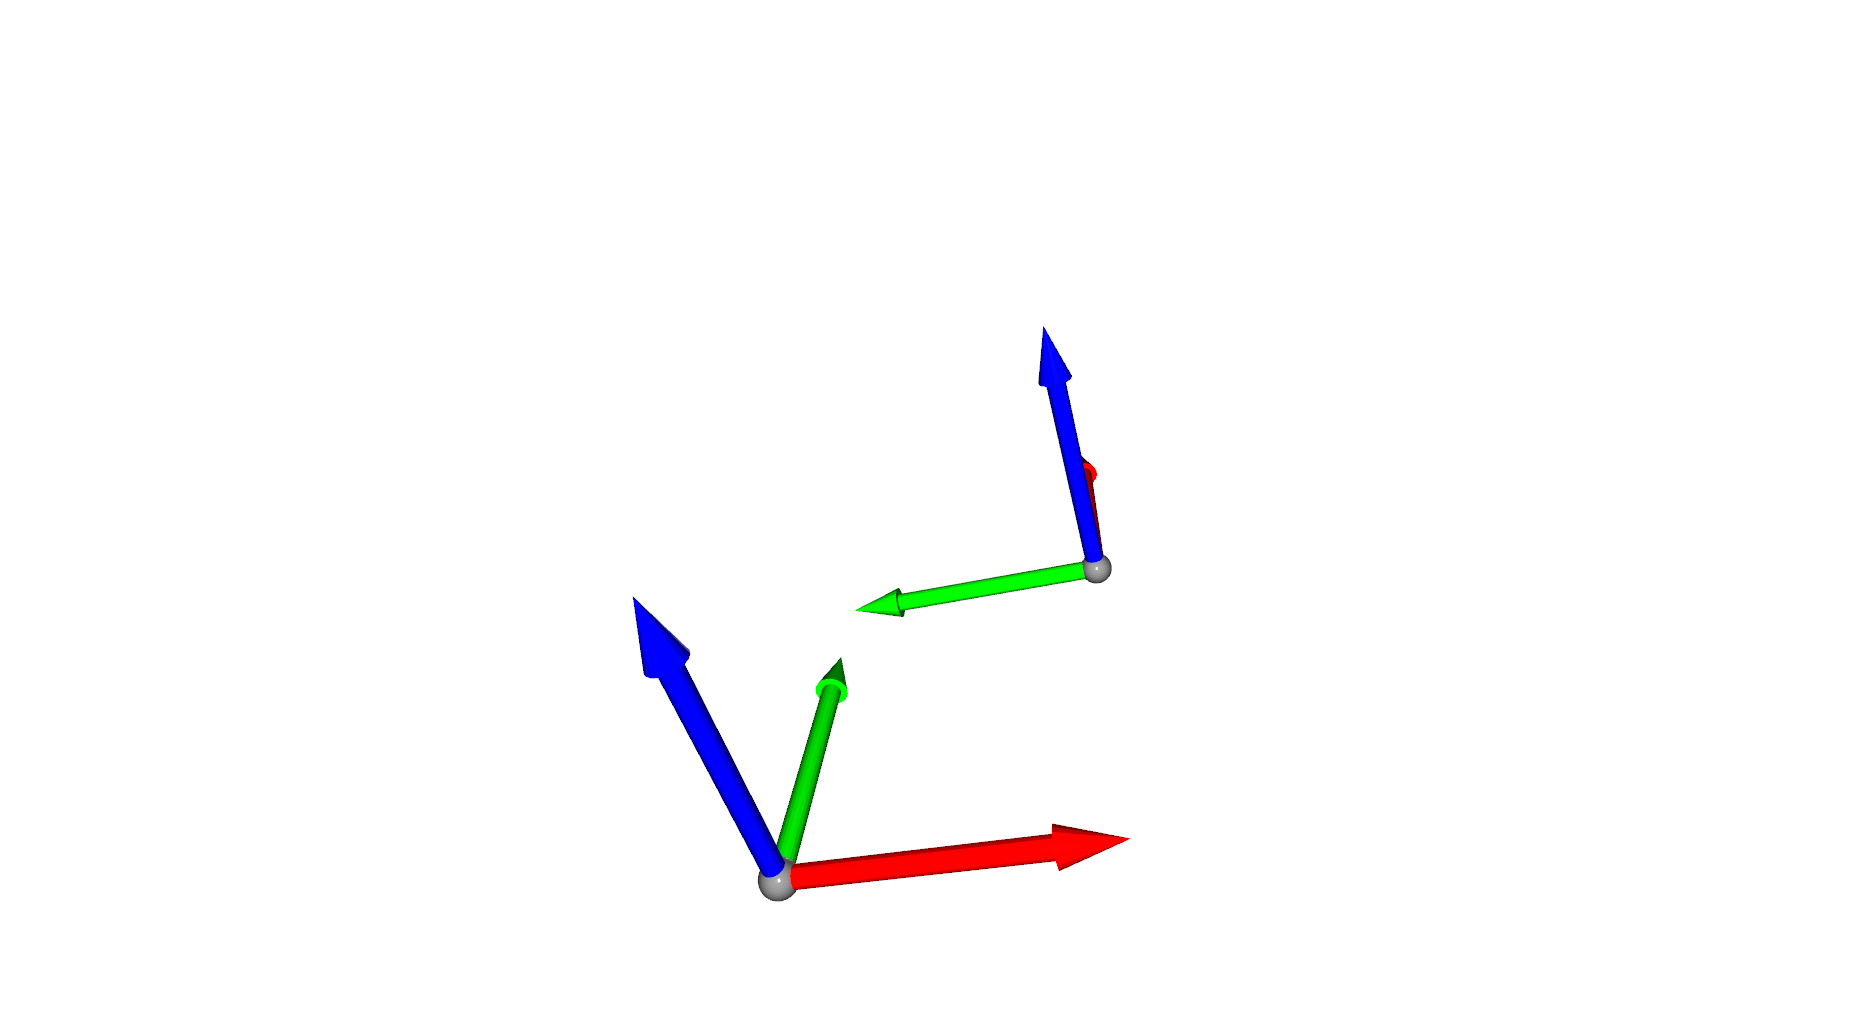

In [6]:
mesh = o3d.geometry.TriangleMesh.create_coordinate_frame()
T = np.eye(4)
T[:3, :3] = mesh.get_rotation_matrix_from_xyz((0, 0, np.pi/2))
T[0, 3] = 1
T[1, 3] = 1.3
print(T)
mesh_t = copy.deepcopy(mesh).transform(T)
#o3d.visualization.draw_geometries([mesh, mesh_t])
o3d.visualization.draw_geometries([mesh, mesh_t])